## 快递物流行业数据分析
#### 数据清洗


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', family='KaiTi')

data = pd.read_csv('../dataSets/2.Logistics_industry/data_wuliu.csv', encoding='gbk')
data.dropna(axis=0, how='any', inplace=True)
data.drop('订单行', axis=1, inplace=True)
# 删除重复数据
data.drop_duplicates(keep='first', inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1068 entries, 0 to 1160
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1068 non-null   object 
 1   销售时间    1068 non-null   object 
 2   交货时间    1068 non-null   object 
 3   货品交货状况  1068 non-null   object 
 4   货品      1068 non-null   object 
 5   货品用户反馈  1068 non-null   object 
 6   销售区域    1068 non-null   object 
 7   数量      1068 non-null   float64
 8   销售金额    1068 non-null   object 
dtypes: float64(1), object(8)
memory usage: 83.4+ KB


In [2]:
# 数据清洗，将object类型的价格转化为int
sell_data = data['销售金额'].str.strip('元')
sell_data_combine = sell_data.str.split(',').map(lambda element: element[0] + element[1])
data['销售金额'] = sell_data_combine.map(lambda element: element[:-1] + '0000' if element[-1] == '万' else element)
data['销售金额'] = data['销售金额'].astype('int64')
# 重置索引
data.reset_index(drop=True, inplace=True)

# 去除首字空格
data['货品交货状况'] = data['货品交货状况'].str.strip()
data

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239
...,...,...,...,...,...,...,...,...,...
1063,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041
1064,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944
1065,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408
1066,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218


In [3]:
data.describe()

,数量,销售金额
count,1068.000000,1.068000e+03
mean,79.676498,1.295271e+05
std,610.090519,1.154254e+06
min,1.000000,0.000000e+00
25%,1.000000,3.090500e+03
50%,1.000000,9.624500e+03
75%,4.000000,3.634025e+04
max,11500.000000,3.270000e+07


In [4]:
# 删除销售金额为0的数据,2/8法则存在，不需要处理极端值
data = data[data['销售金额'] != 0]
data.describe()

,数量,销售金额
count,1067.000000,1.067000e+03
mean,79.750234,1.296485e+05
std,610.371849,1.154788e+06
min,1.000000,5.100000e+01
25%,1.000000,3.096500e+03
50%,1.000000,9.639000e+03
75%,4.000000,3.634750e+04
max,11500.000000,3.270000e+07


In [5]:
# 取出月份，单独为一列辅助列
data['销售时间'] = pd.to_datetime(data['销售时间'])
data['月份'] = data['销售时间'].map(lambda element: element.month)

C:\Users\heimaolala\AppData\Local\Temp\ipykernel_118872\2967258822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['销售时间'] = pd.to_datetime(data['销售时间'])
C:\Users\heimaolala\AppData\Local\Temp\ipykernel_118872\2967258822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['月份'] = data['销售时间'].map(lambda element: element.month)


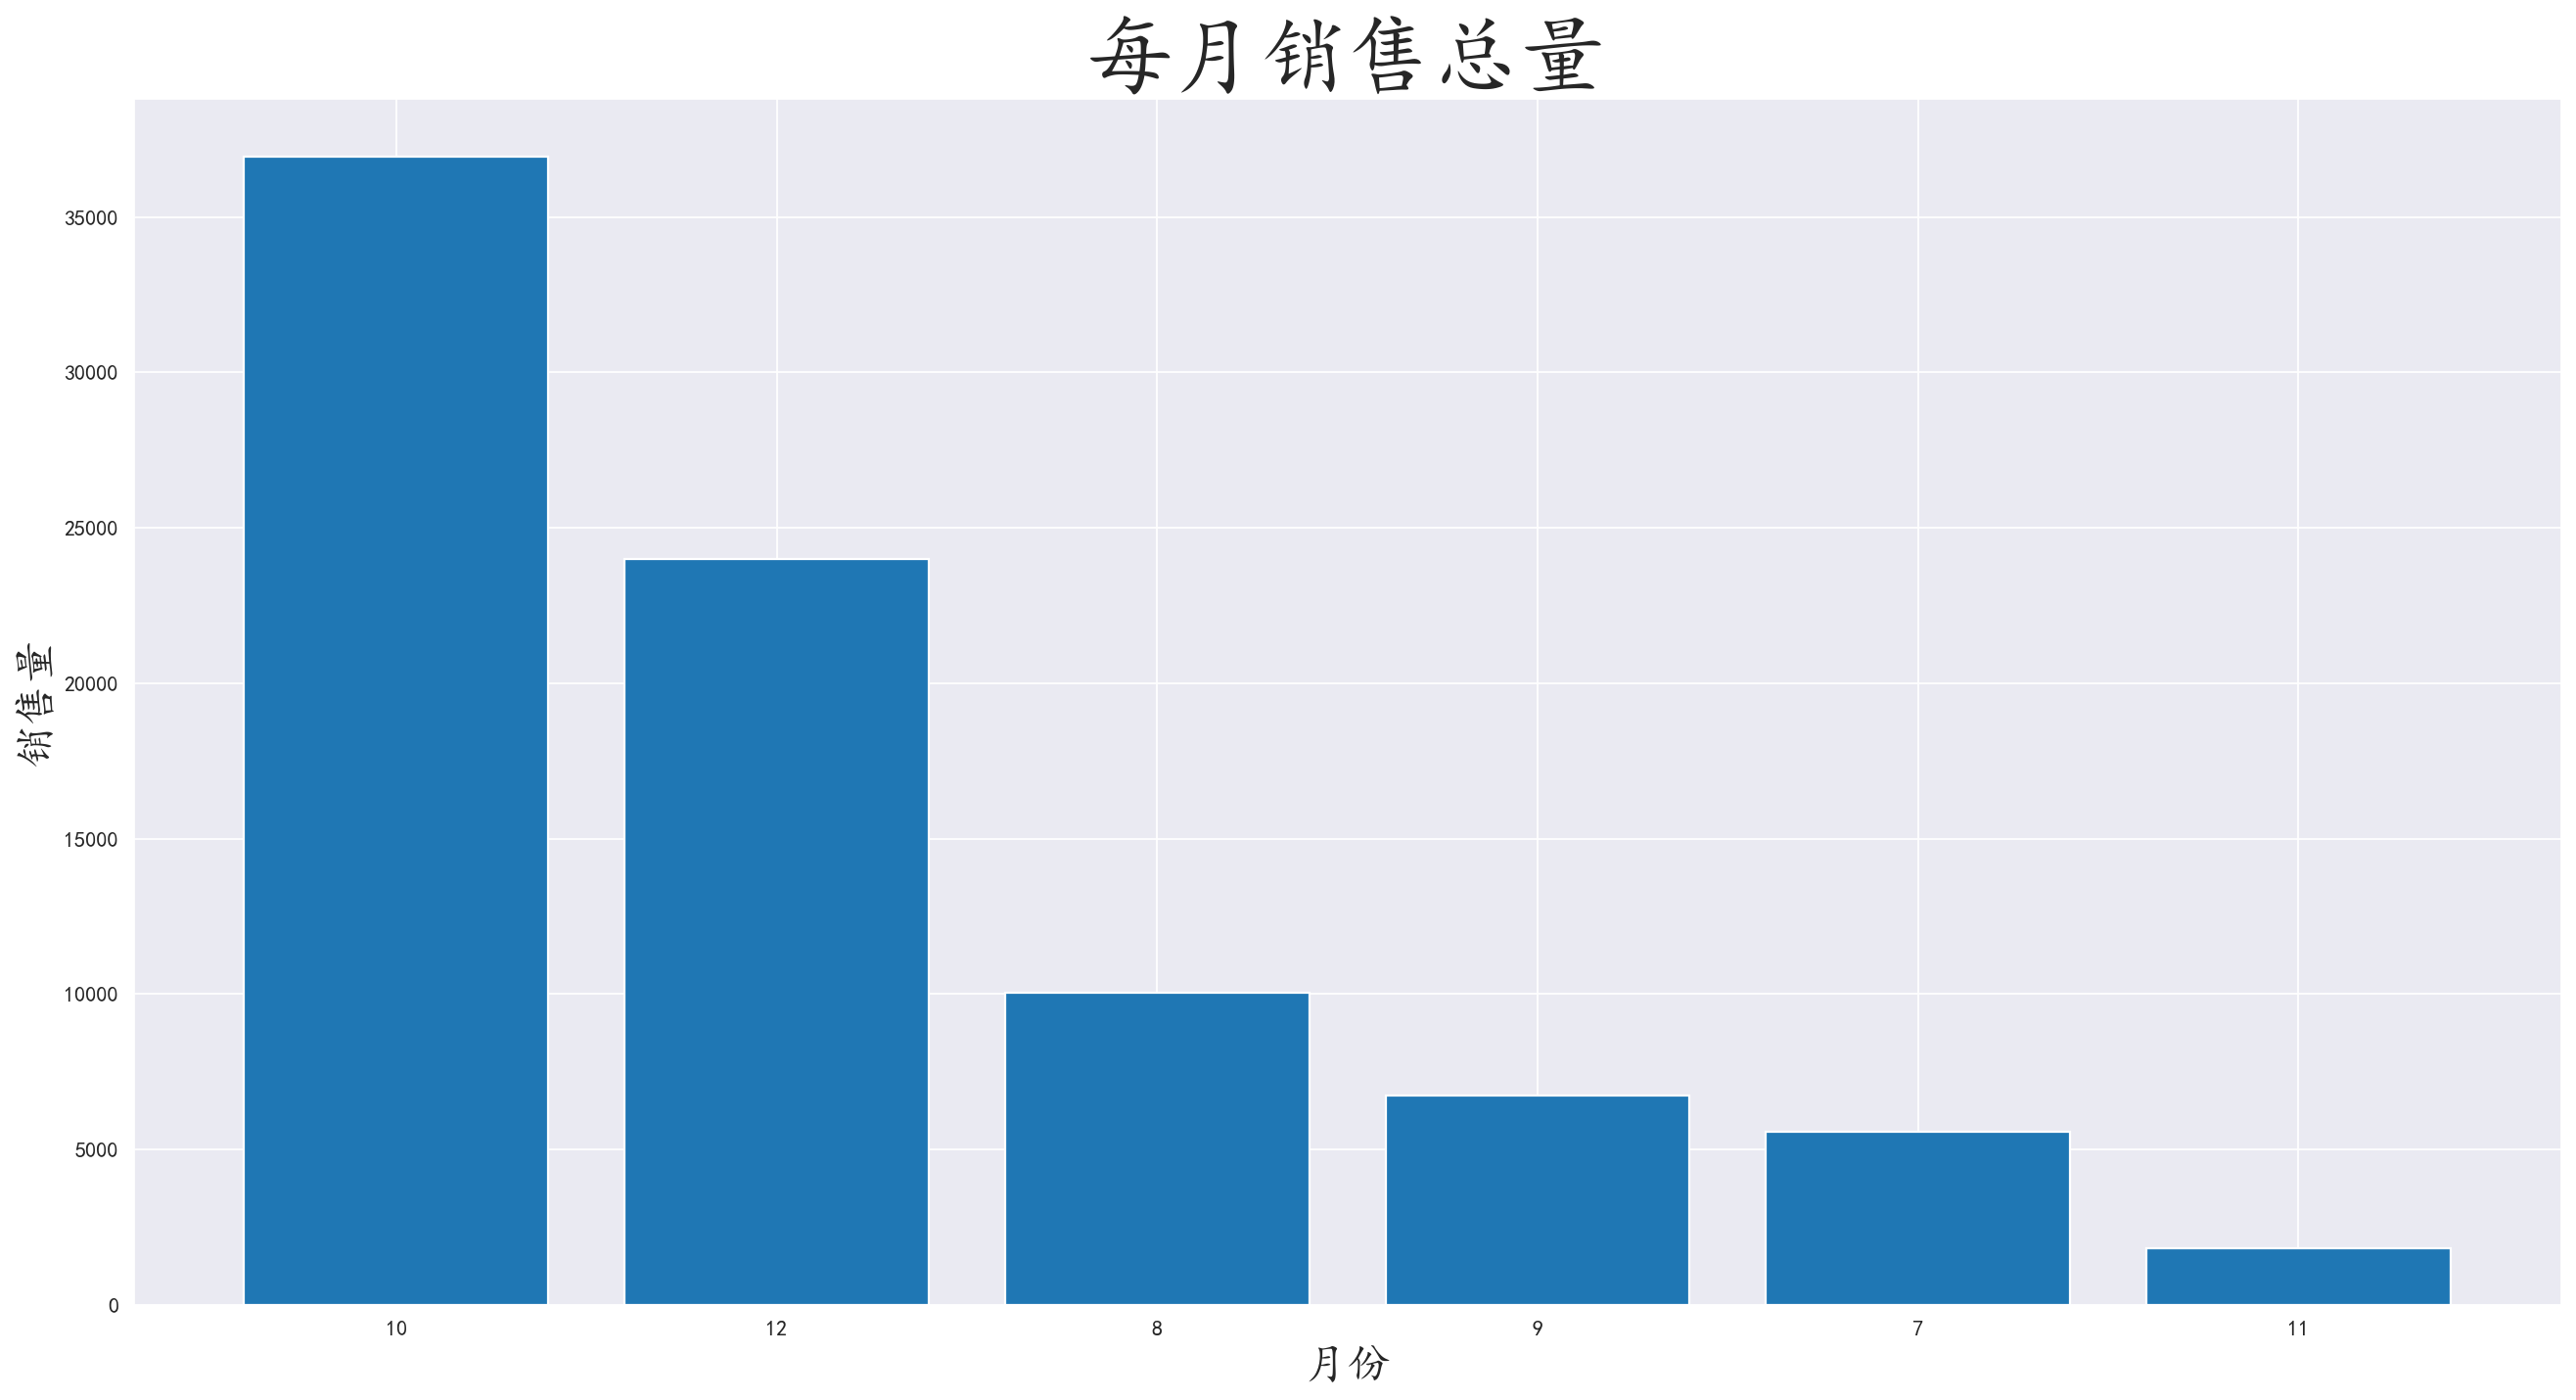

In [6]:
# 分析哪个月销售量最高
sell_num = data.groupby(by='月份')['数量'].sum()
sell_num_sort = sell_num.sort_values(ascending=False)

x = sell_num_sort.index
y = sell_num_sort.values

plt.figure(figsize=(20, 10), dpi=160)

plt.title('每月销售总量', fontsize=40)
plt.xlabel('月份', fontsize=20)
plt.ylabel('销售量', fontsize=20)

plt.xticks(range(len(x)), x)

plt.bar(range(len(x)), y)

plt.show()


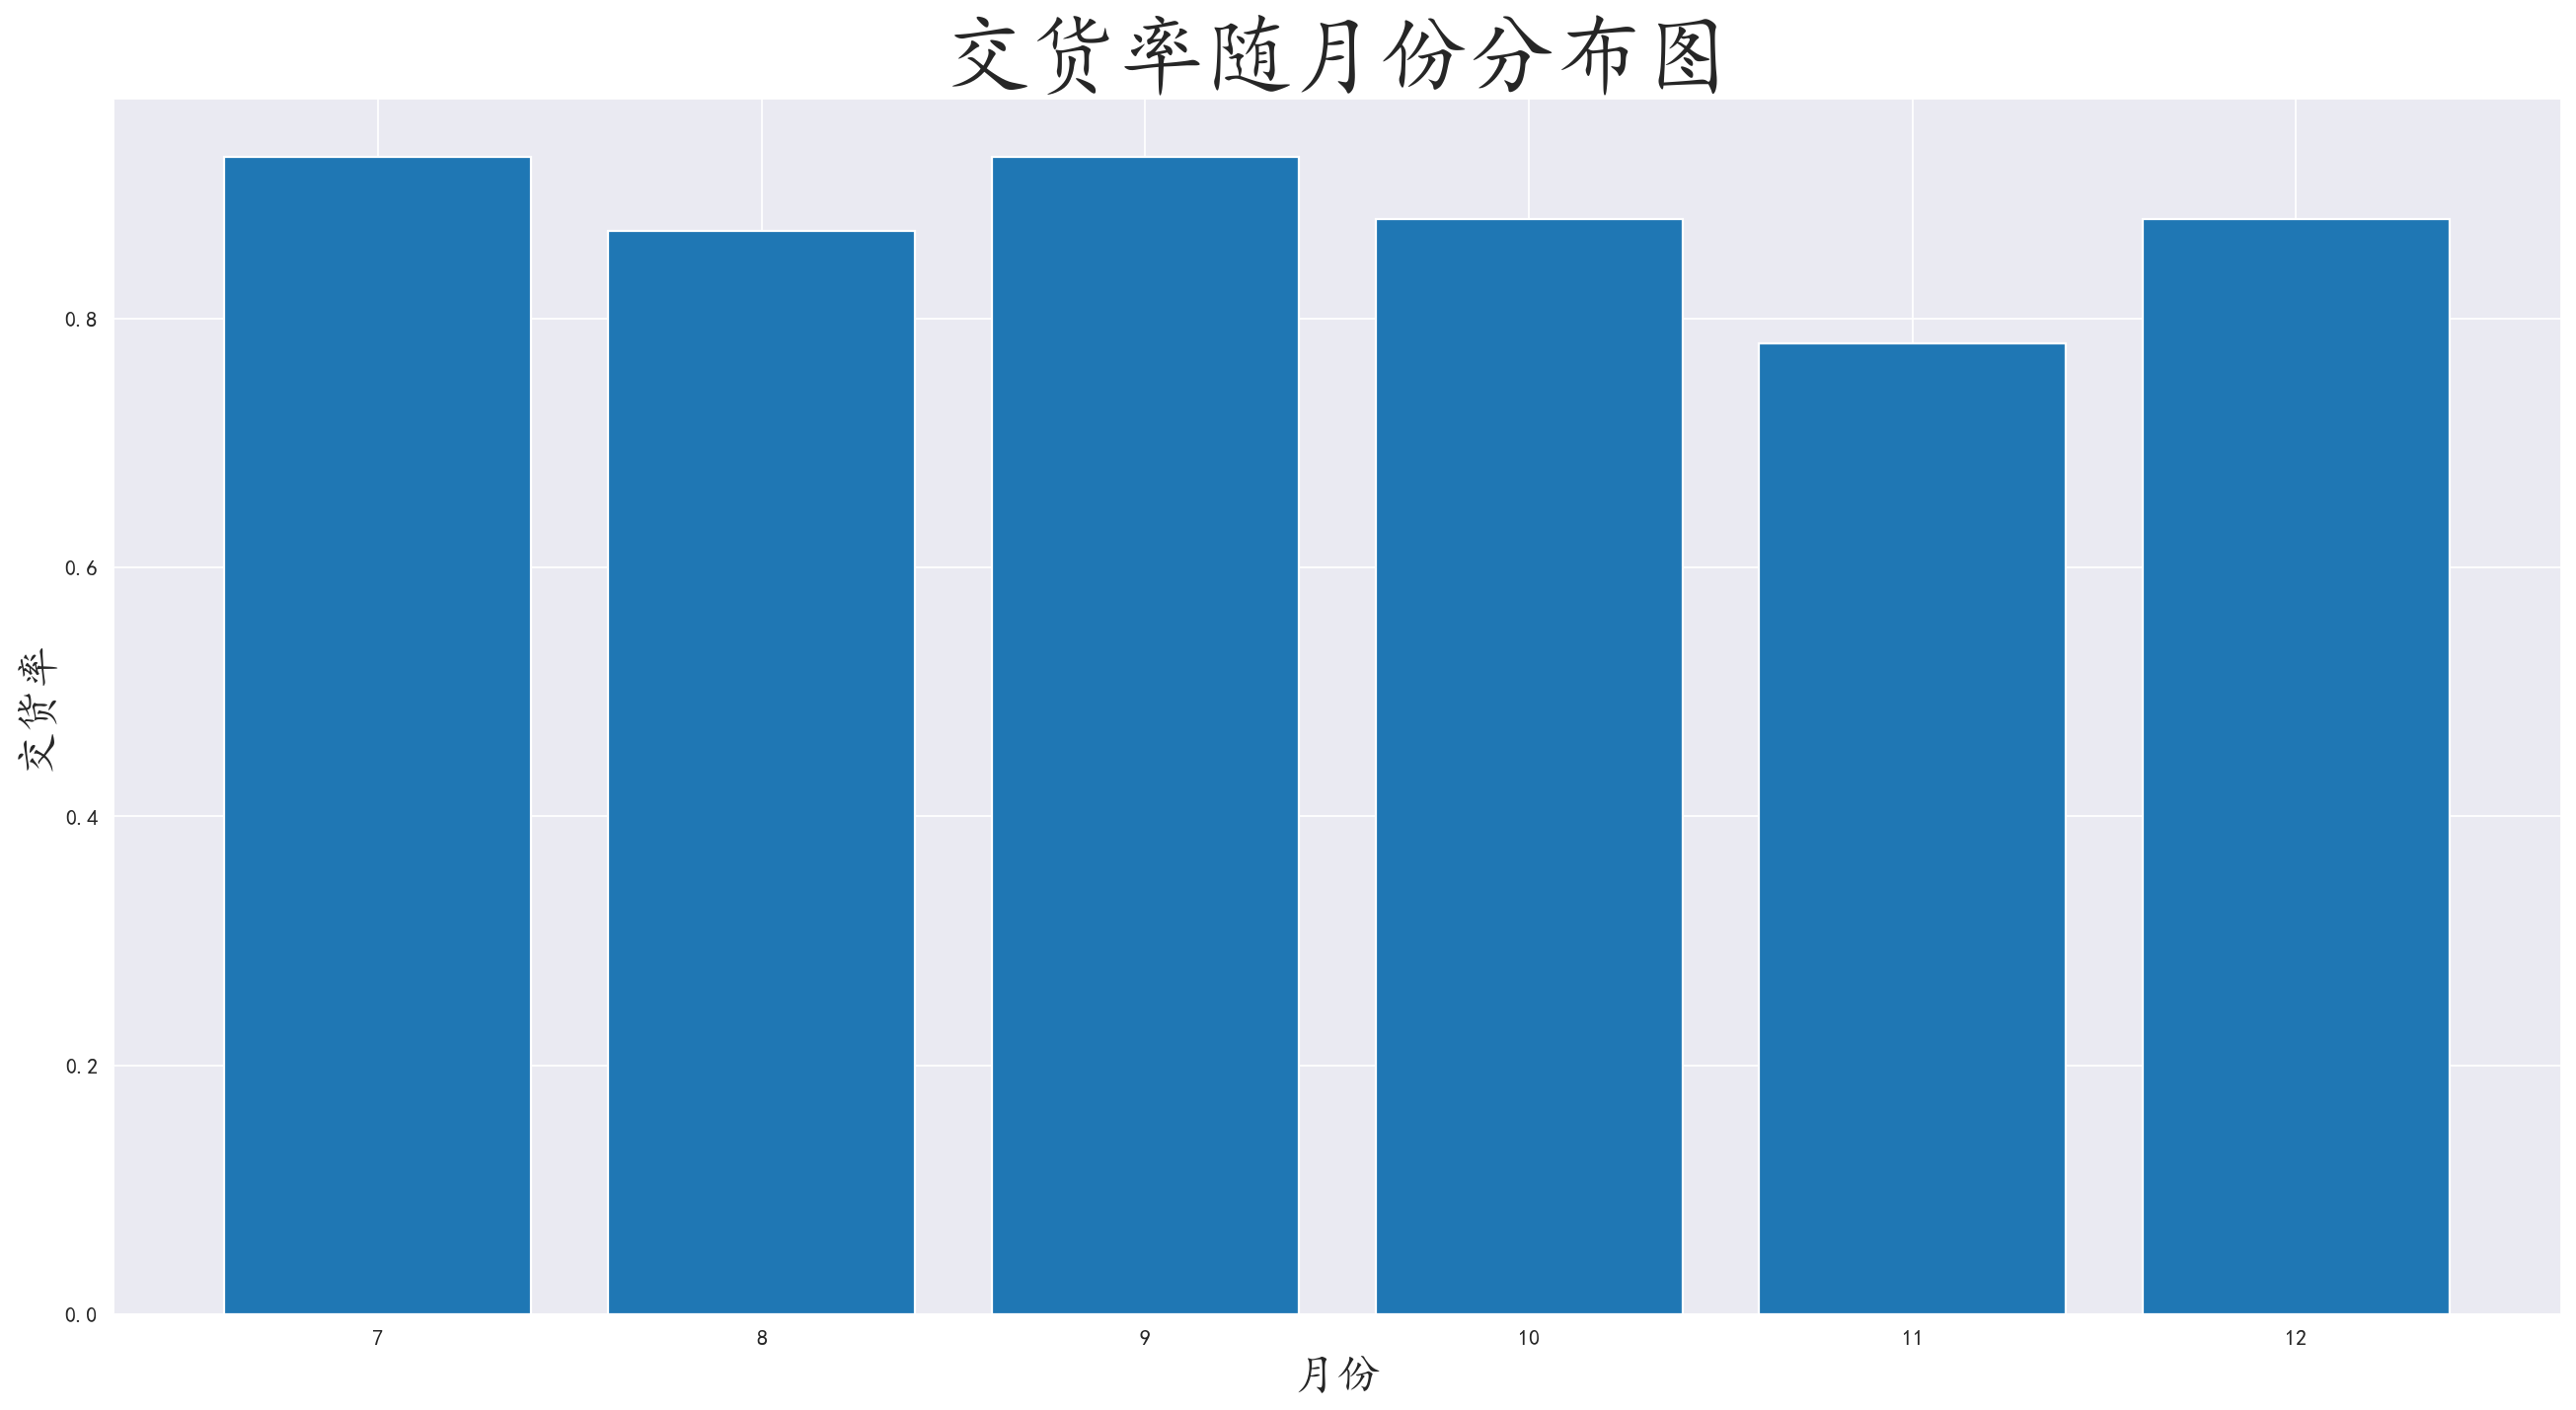

In [7]:
# 根据月份和交货情况分组
receive_situation = data.groupby(by=['月份', '货品交货状况']).size().unstack()

# 计算交货率：
receive_situation['交货率'] = (receive_situation['按时交货'] / (receive_situation['按时交货'] + receive_situation['晚交货'])).round(2)

x = receive_situation.index
y = receive_situation['交货率'].values

plt.figure(figsize=(20, 10), dpi=160)

plt.title('交货率随月份分布图', fontsize=40)
plt.xlabel('月份', fontsize=20)
plt.ylabel('交货率', fontsize=20)

plt.bar(x, y)

plt.show()


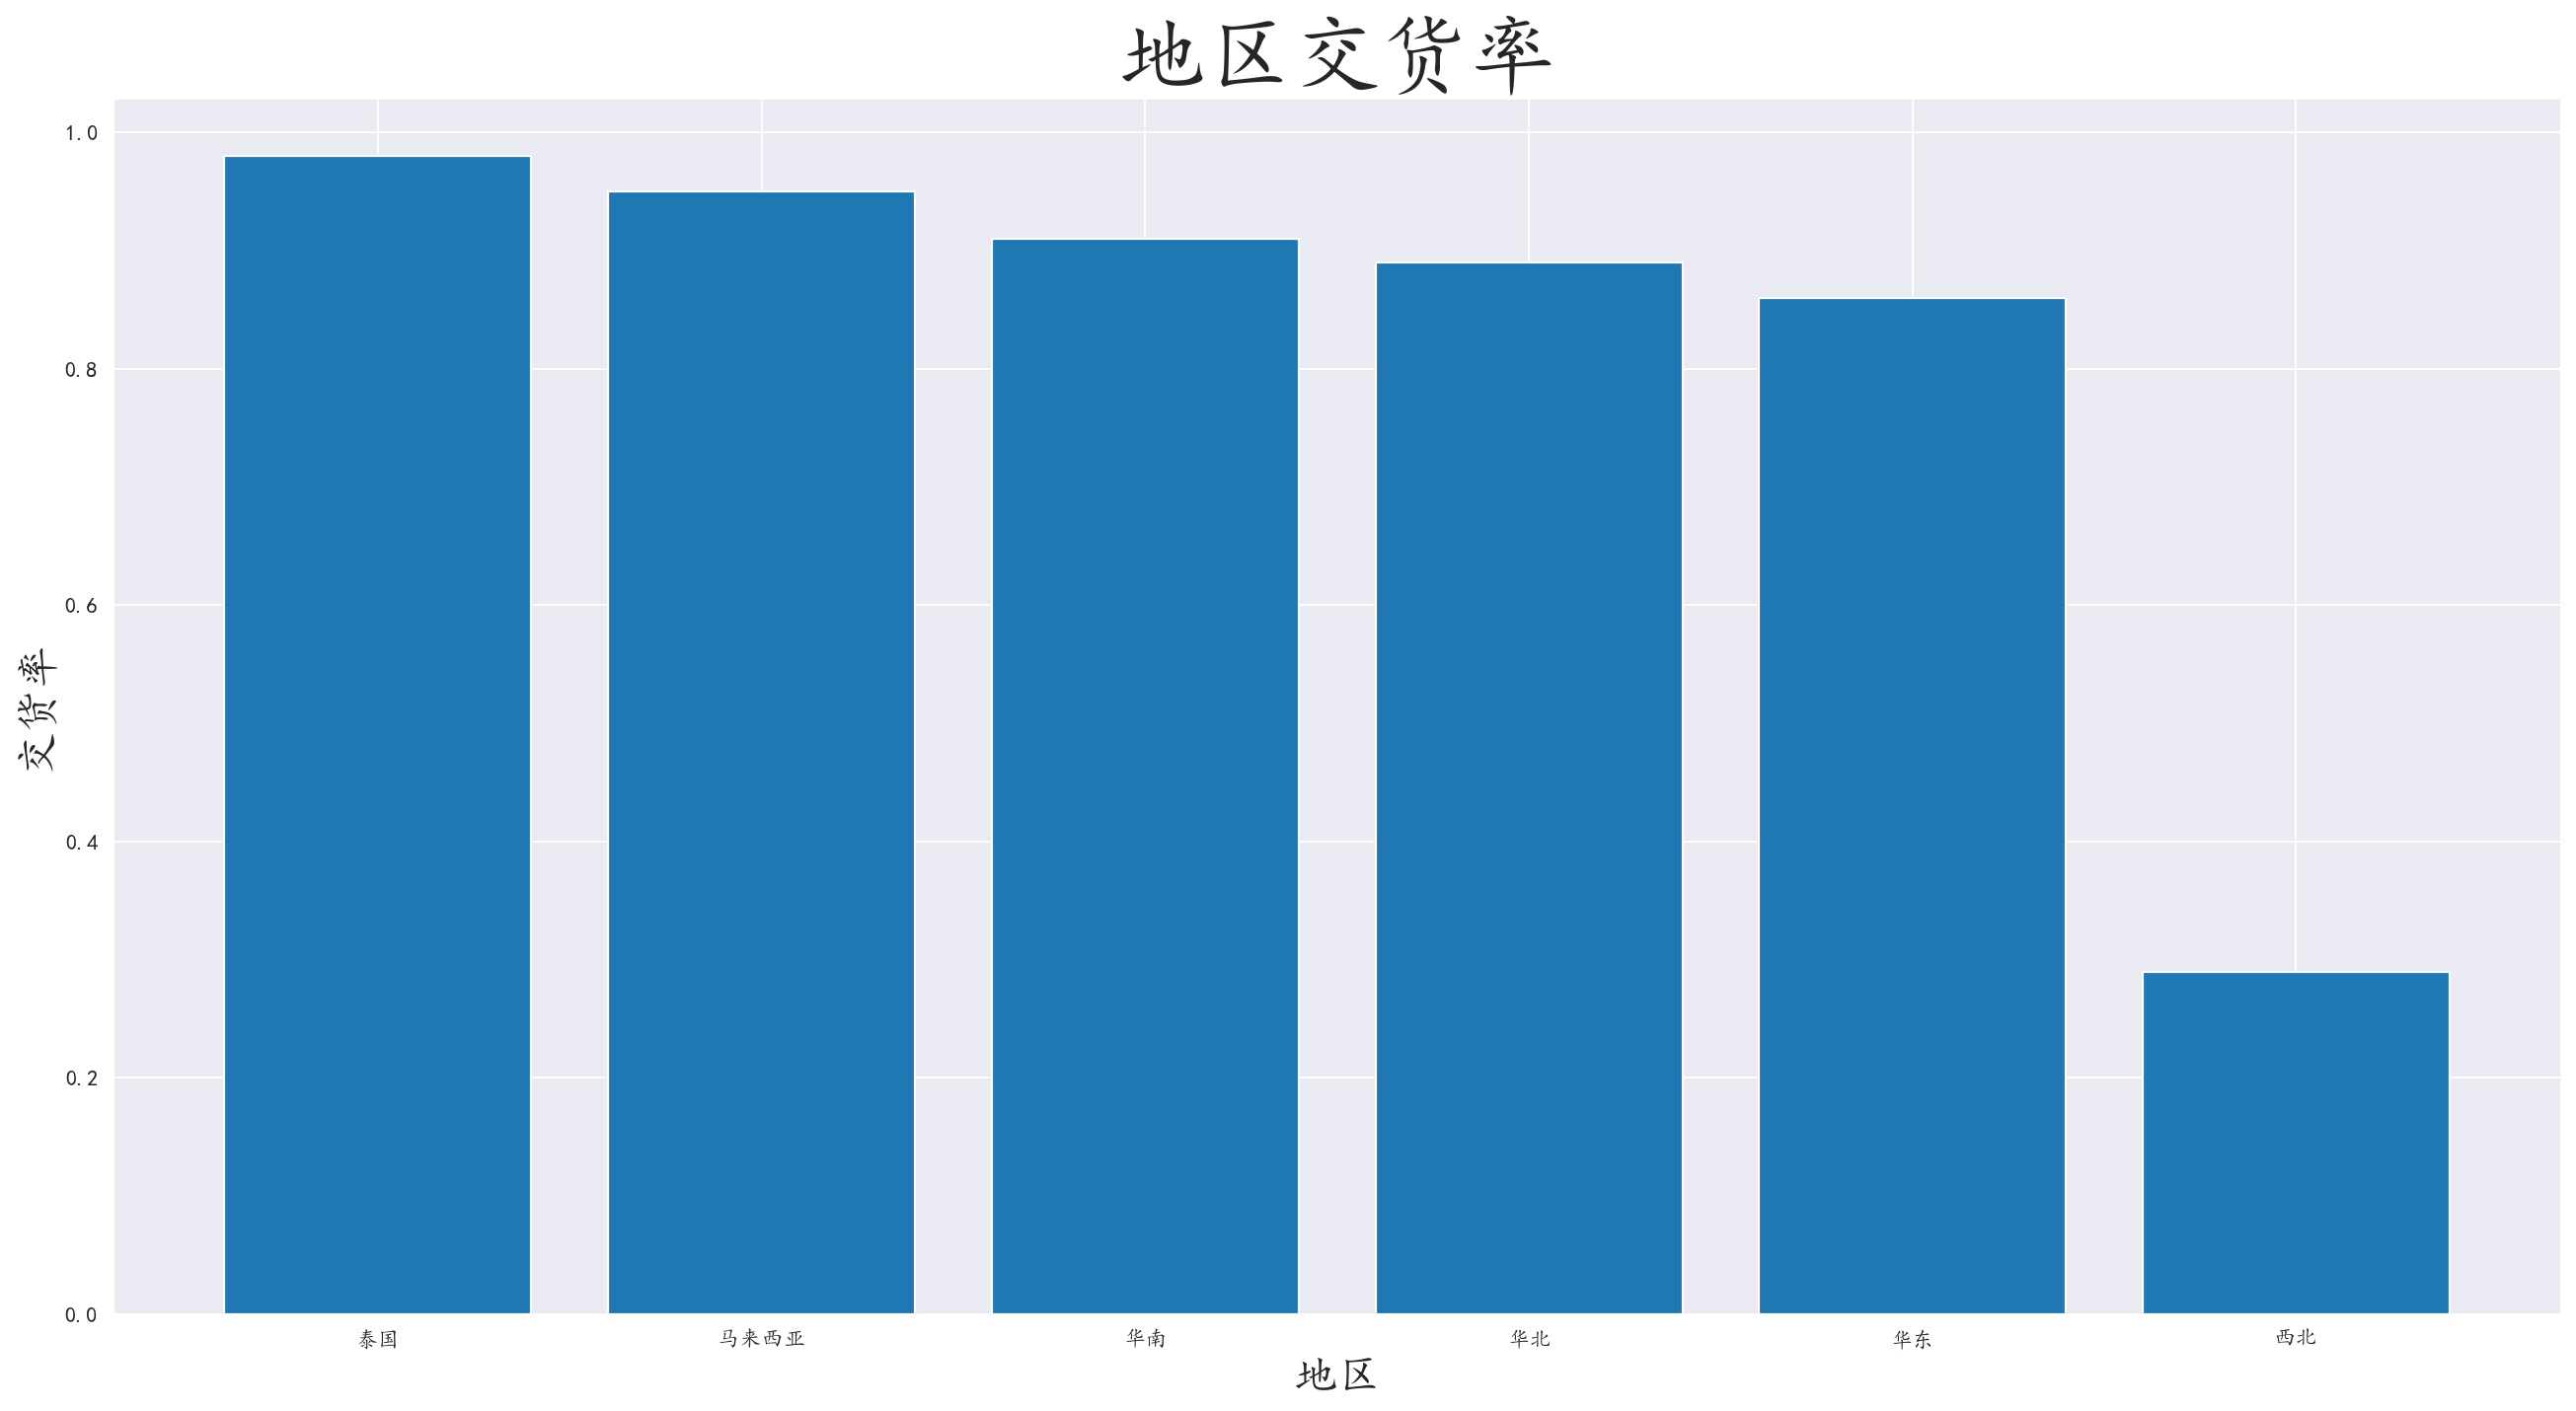

In [8]:
# 按照交货地点分析
receive_situation_area = data.groupby(by=['销售区域', '货品交货状况']).size().unstack()

# 计算交货率：
receive_situation_area['交货率'] = (receive_situation_area['按时交货'] / (receive_situation_area['按时交货'] + receive_situation_area['晚交货'])).round(2)
successful_percent = receive_situation_area['交货率'].sort_values(ascending=False)

x = successful_percent.index
y = successful_percent.values

plt.figure(figsize=(20, 10), dpi=160)

plt.title('地区交货率', fontsize=40)
plt.xlabel('地区', fontsize=20)
plt.ylabel('交货率', fontsize=20)

plt.bar(x, y)

plt.show()

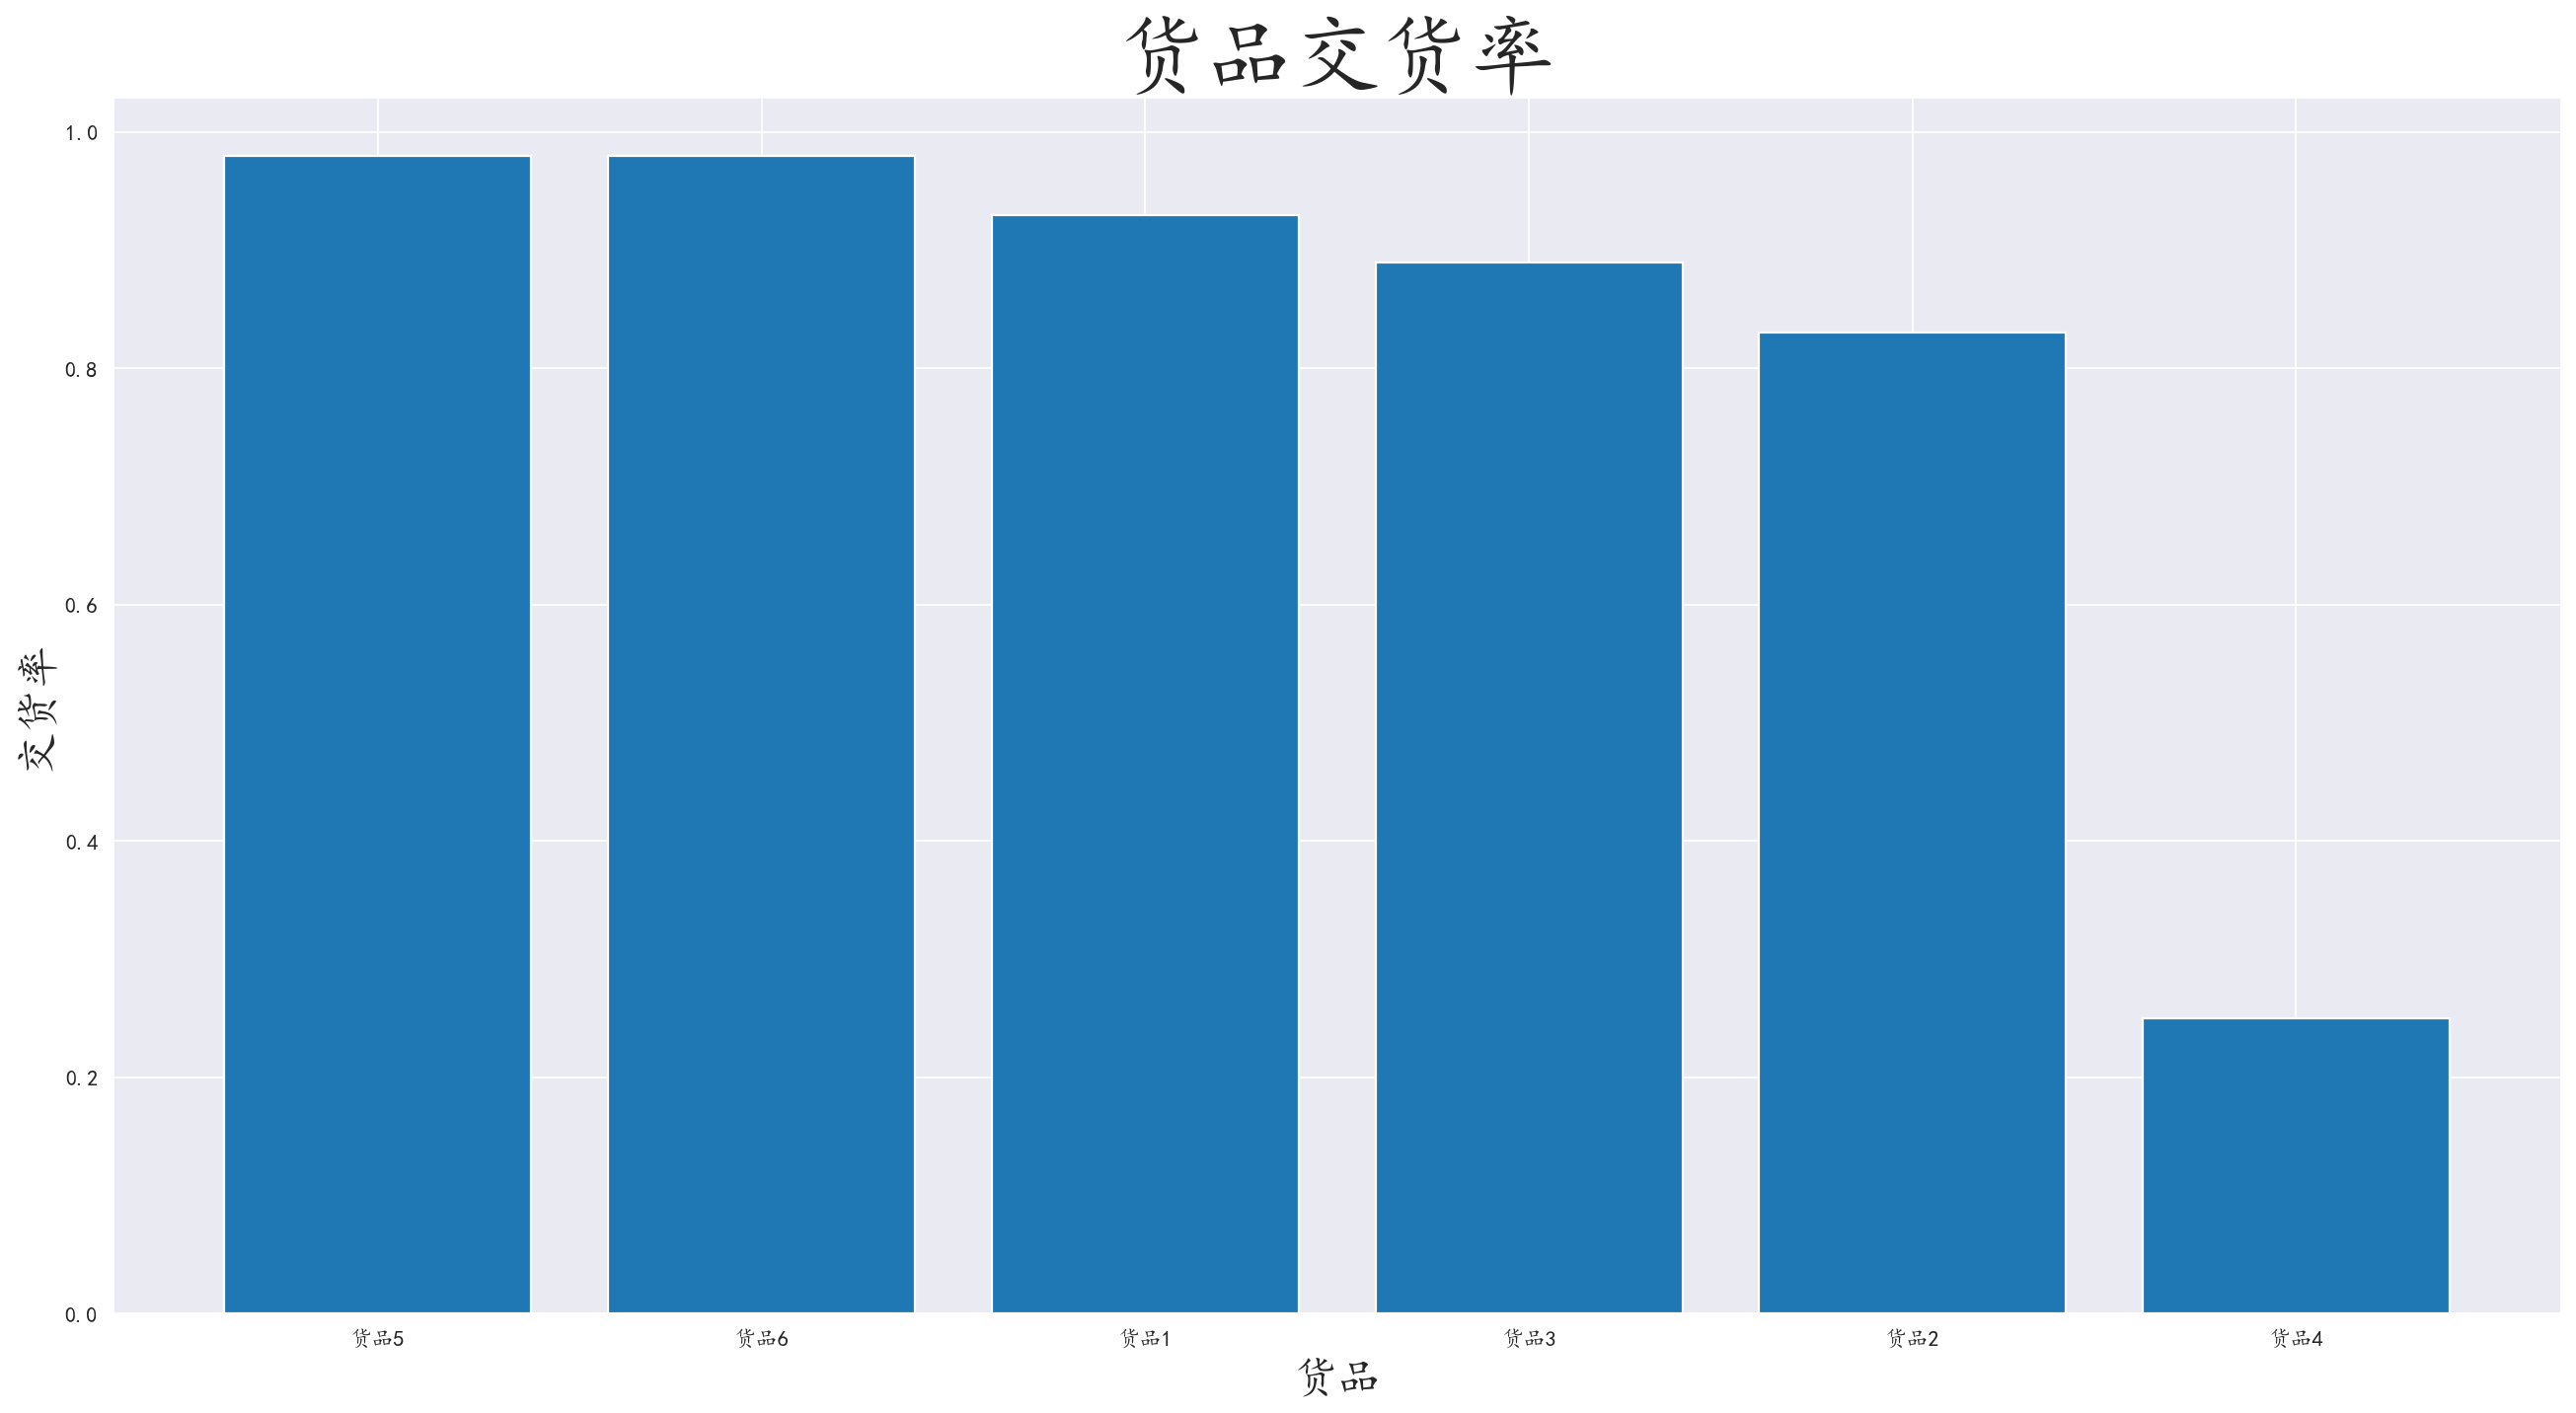

In [9]:
# 按照商品分析
receive_situation_product = data.groupby(by=['货品', '货品交货状况']).size().unstack()

# 计算交货率：
receive_situation_product['交货率'] = (receive_situation_product['按时交货'] / (receive_situation_product['按时交货'] + receive_situation_product['晚交货'])).round(2)
successful_percent = receive_situation_product['交货率'].sort_values(ascending=False)

x = successful_percent.index
y = successful_percent.values

plt.figure(figsize=(20, 10), dpi=160)

plt.title('货品交货率', fontsize=40)
plt.xlabel('货品', fontsize=20)
plt.ylabel('交货率', fontsize=20)

plt.bar(x, y)

plt.show()

In [10]:
# 按照商品和地区分析
receive_situation_mix = data.groupby(by=['货品', '销售区域', '货品交货状况']).size().unstack()

# 计算交货率：
receive_situation_mix['交货率'] = (receive_situation_mix['按时交货'] / (receive_situation_mix['按时交货'] + receive_situation_mix['晚交货'])).round(2)
receive_situation_mix



货品交货状况     按时交货   晚交货   交货率
货品  销售区域                   
货品1 华北     14.0   1.0  0.93
    华南     10.0   1.0  0.91
    西北      3.0   NaN   NaN
货品2 华东    241.0  39.0  0.86
    马来西亚    1.0   9.0  0.10
货品3 华北    199.0  25.0  0.89
货品4 西北     13.0  39.0  0.25
货品5 泰国    170.0   4.0  0.98
货品6 马来西亚  291.0   7.0  0.98

Text(0.5, 1.0, '每月销售潜力')

<Figure size 3200x1600 with 0 Axes>

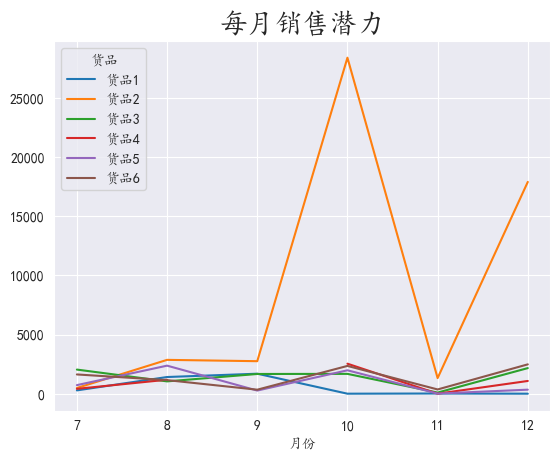

In [16]:
# 查看销售潜力
# 按照月份
month_sell_ability = data.groupby(by=['月份', '货品'])['数量'].sum().unstack()
plt.figure(figsize=(20, 10), dpi=160)
month_sell_ability.plot(kind='line')
plt.title('每月销售潜力', fontsize=20)

Text(0.5, 1.0, '销售区域潜力')

<Figure size 3200x1600 with 0 Axes>

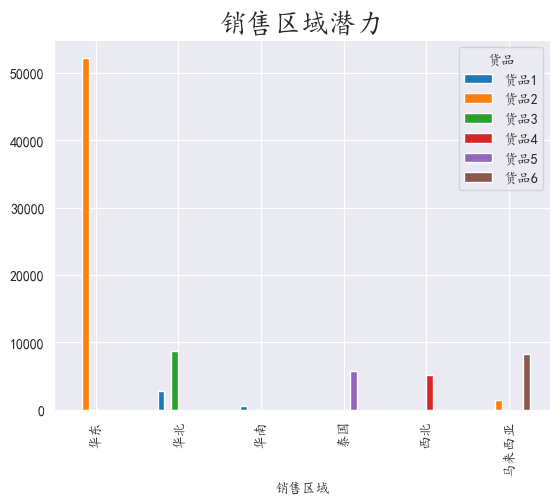

In [17]:
# 查看销售潜力
# 按照地区
area_sell_ability = data.groupby(by=['销售区域', '货品'])['数量'].sum().unstack()
plt.figure(figsize=(20, 10), dpi=160)
area_sell_ability.plot(kind='bar')
plt.title('销售区域潜力', fontsize=20)

In [13]:
# 查看销售潜力
# 按照月份和区域
area_month_sell_ability = data.groupby(by=['月份', '销售区域', '货品'])['数量'].sum().unstack()

area_month_sell_ability

货品          货品1      货品2     货品3     货品4     货品5     货品6
月份 销售区域                                                 
7  华东       NaN    484.0     NaN     NaN     NaN     NaN
   华北       1.0      NaN  2041.5     NaN     NaN     NaN
   华南     282.0      NaN     NaN     NaN     NaN     NaN
   泰国       NaN      NaN     NaN     NaN   728.0     NaN
   西北       NaN      NaN     NaN   414.0     NaN     NaN
   马来西亚     NaN      2.0     NaN     NaN     NaN  1631.0
8  华东       NaN   1360.0     NaN     NaN     NaN     NaN
   华北    1410.0      NaN  1045.0     NaN     NaN     NaN
   华南       3.0      NaN     NaN     NaN     NaN     NaN
   泰国       NaN      NaN     NaN     NaN  2374.0     NaN
   西北       NaN      NaN     NaN  1184.0     NaN     NaN
   马来西亚     NaN   1503.0     NaN     NaN     NaN  1151.0
9  华东       NaN   2750.0     NaN     NaN     NaN     NaN
   华北    1409.0      NaN  1670.0     NaN     NaN     NaN
   华南     283.0      NaN     NaN     NaN     NaN     NaN
   泰国       NaN      NaN     NaN     NaN   269.0     NaN
   西北       1.0      NaN     NaN     NaN     NaN     NaN
   马来西亚     NaN      1.0     NaN     NaN     NaN   342.0
10 华东       NaN  28400.0     NaN     NaN     NaN     NaN
   华北       3.0      NaN  1679.0     NaN     NaN     NaN
   泰国       NaN      NaN     NaN     NaN  1981.0     NaN
   西北       1.0      NaN     NaN  2540.0     NaN     NaN
   马来西亚     NaN      NaN     NaN     NaN     NaN  2351.0
11 华东       NaN   1322.0     NaN     NaN     NaN     NaN
   华北       2.0      NaN    97.0     NaN     NaN     NaN
   华南       9.0      NaN     NaN     NaN     NaN     NaN
   泰国       NaN      NaN     NaN     NaN    14.0     NaN
   西北       9.0      NaN     NaN     3.0     NaN     NaN
   马来西亚     NaN      1.0     NaN     NaN     NaN   362.0
12 华东       NaN  17900.0     NaN     NaN     NaN     NaN
   华北       2.0      NaN  2167.0     NaN     NaN     NaN
   华南       2.0      NaN     NaN     NaN     NaN     NaN
   泰国       NaN      NaN     NaN     NaN   344.0     NaN
   西北       NaN      NaN     NaN  1080.0     NaN     NaN
   马来西亚     NaN      3.0     NaN     NaN     NaN  2483.0

<Axes: title={'center': '货品合格率'}, xlabel='货品'>

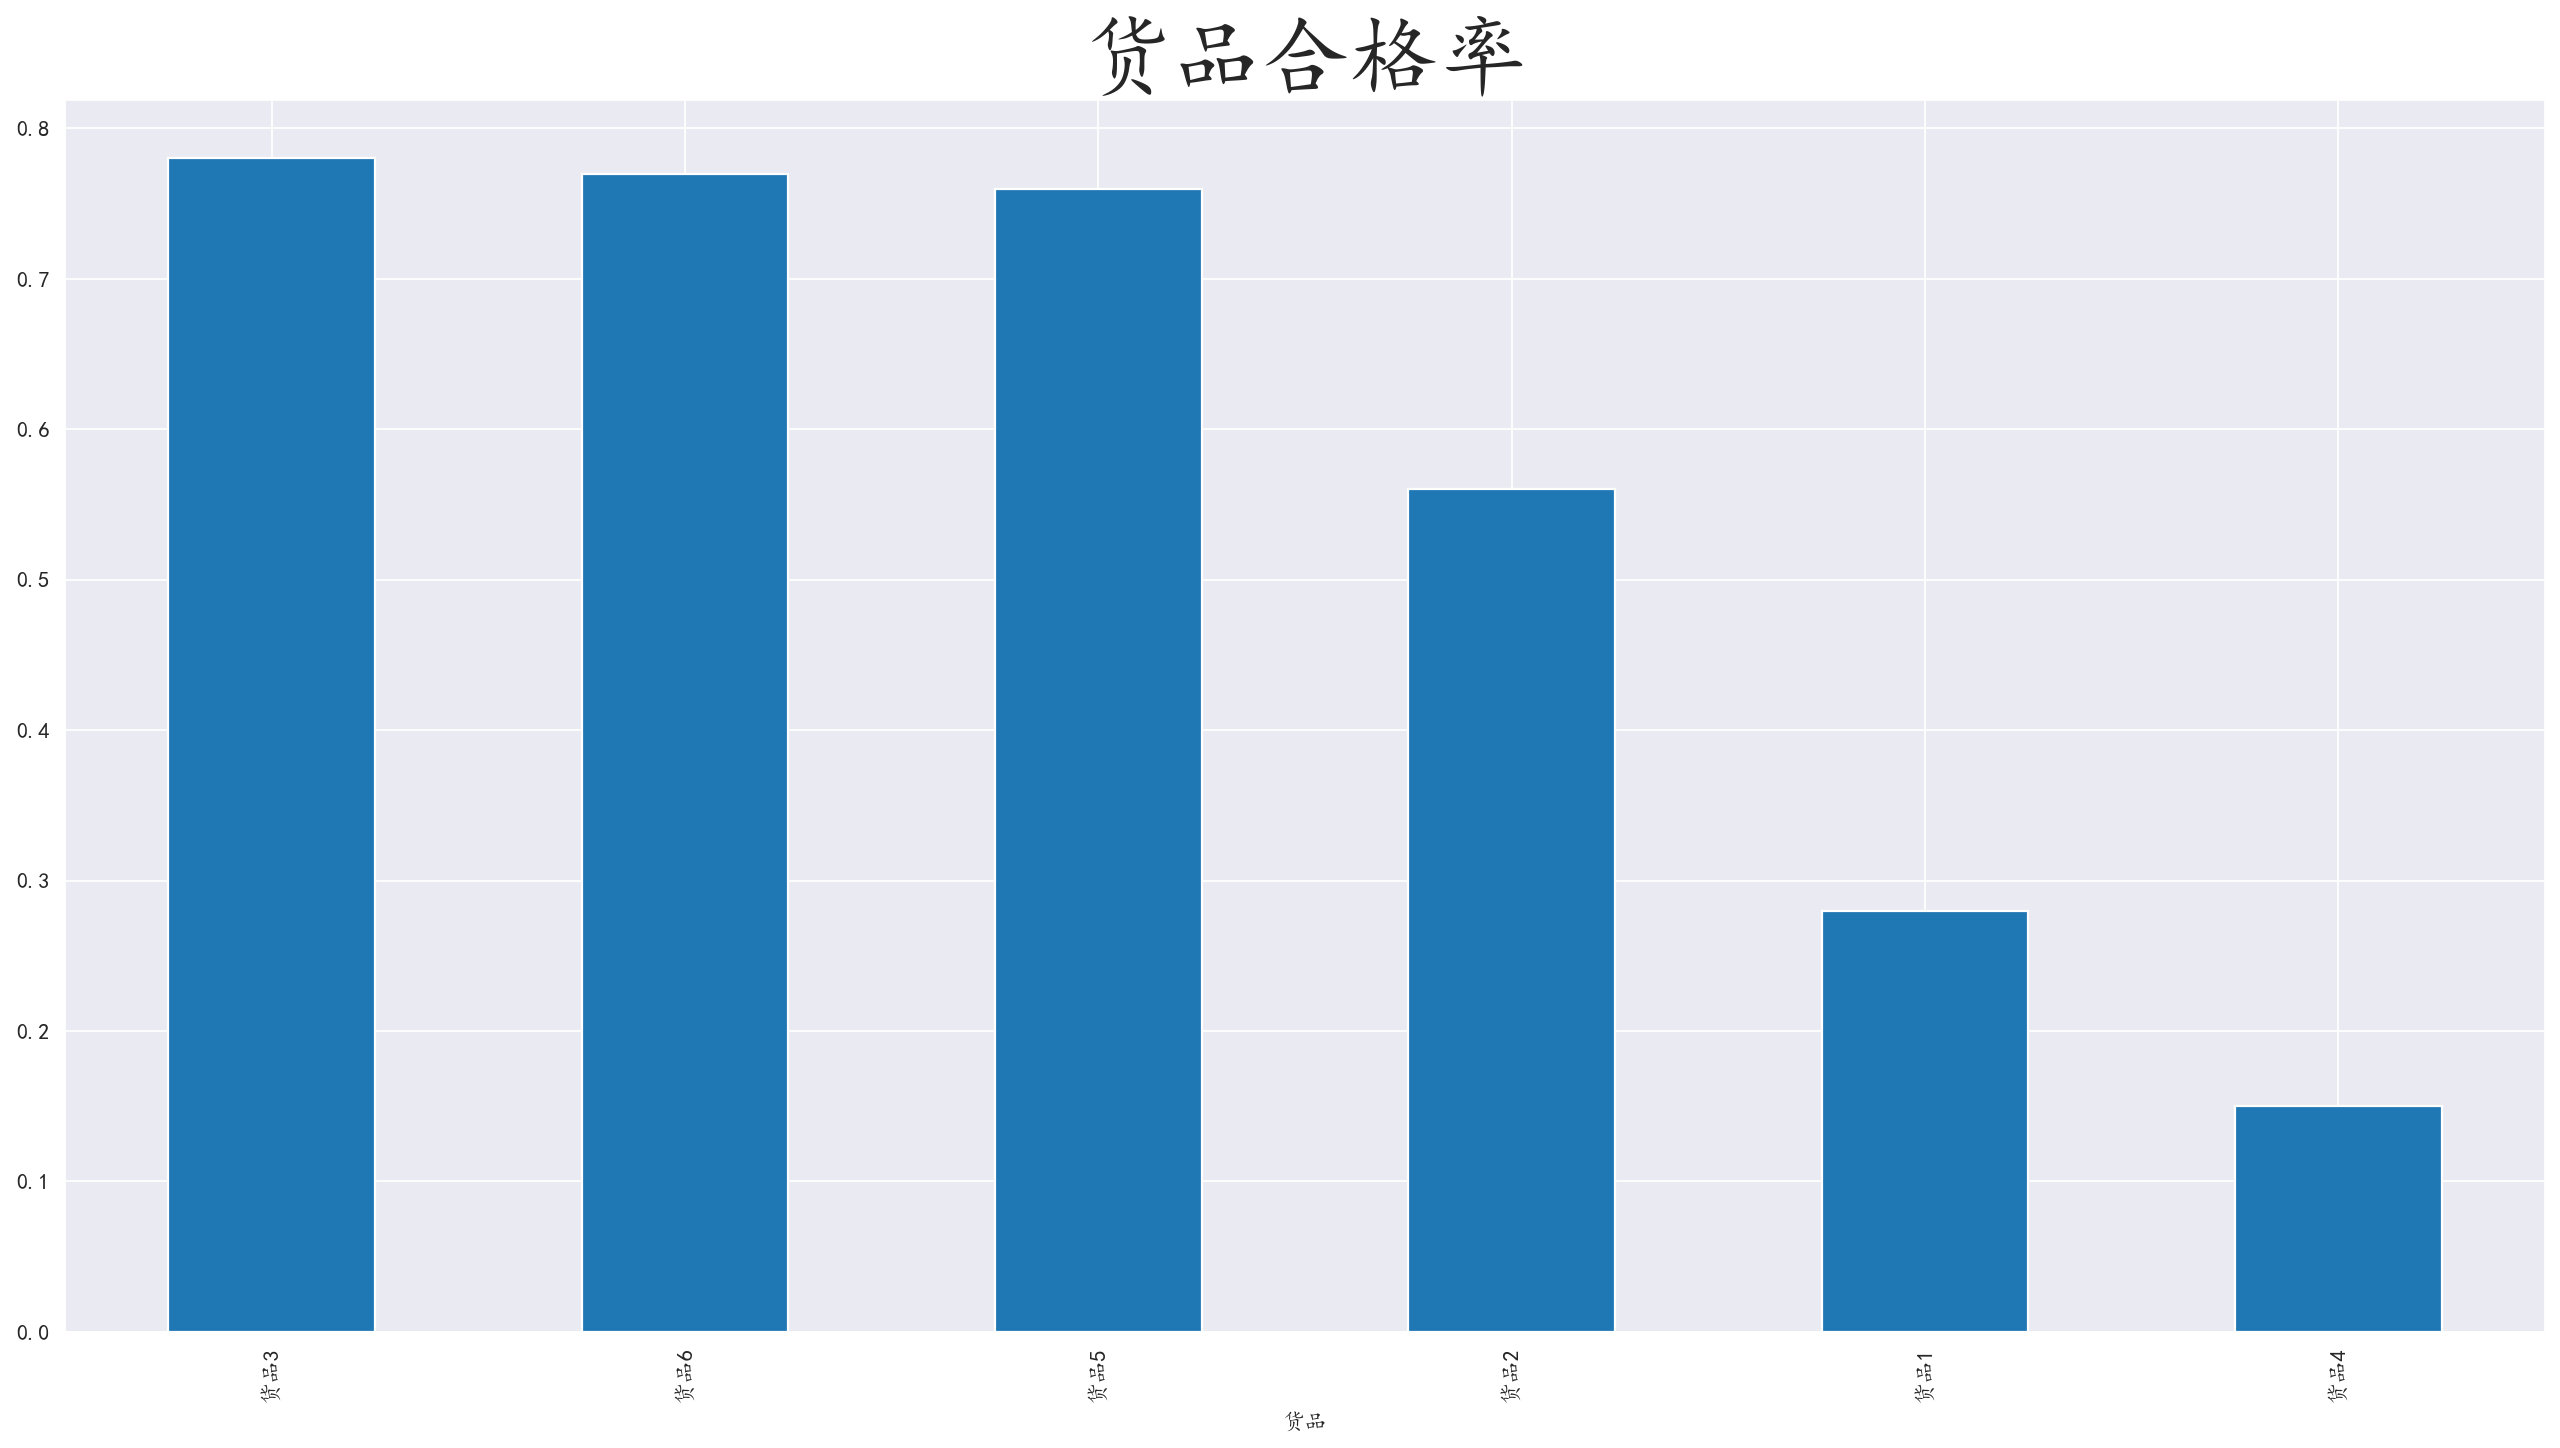

In [14]:
# 分析货品是否存在质量问题
quality = data.groupby(by=['货品', '货品用户反馈']).size().unstack()
quality.fillna(0, inplace=True)
quality['qualified_percent'] = (quality['质量合格'] / (quality['质量合格'] + quality['返修'] + quality['拒货'])).round(2)
qualified_percent = quality['qualified_percent'].sort_values(ascending=False)
plt.figure(figsize=(20, 10), dpi=160)
plt.title('货品合格率', fontsize=40)
qualified_percent.plot(kind='bar')